# Homework 3 (100 Points)

The goal of this homework is to get practice with classification.

## Exercise 1 (30 points)

This exercise will re-use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data) from homework 1. Download all files this time.

a) Handle the missing values in the datasets. Briefly explain. **-5 points**

b) Add 2 new features / columns to the datasets that you think might be related to the survival of individuals. Explain. **-5 points**

c) Split the dataset into training and testing. Train a Decision Tree Classifier using all features you think may be related to survival (justify any that you remove). Set the `max_depth` parameter to an appropriate quantity to reduce the runtime and avoid overfitting. Explain with a plot presenting in x-axis the `max_depth` and in y-axis the accuracy (both training and testing). **- 10 points**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

d) Plot the decision tree. Briefly explains how it works. **- 5 points**

In [ ]:
from sklearn.tree import plot_tree


e) Plot the confusion matrix of the above classifier. Comment on the pitfalls of the model (to help: For the examples that were misclassified, choose two at random and walk through the decision tree with their attributes and try to understand why the misclassification occured). **- 5 points**

# Exercise 2 (30pts)

Random Forest algorithm is an extension to the decision trees. We make use of multiple decision trees to make a decsion(classification/regression) in Random Forests.

Ensemble modelling is a method of constructing a strong model using several weak models. Random Forests algorithm is one such ensemble model

Multiple small decision trees trained on random parts of the training data collectively make a decision on an input point. The number of trees in this Random Forest algorithm is a hyper-parameter that you need to finetune to get the best output from this model. 

Every time you construct a tree, you pick random samples of size 'k'(k samples) from the total dataset and construct the tree. Make sure your tree depth is not very high, or the individual tree could overfit to the data. We want the collective model to generalize well to multiple datasets. 

During classification, we consider the decision of the majority of trees to be the final decision. 

In this task, you are asked to construct a random forests algorithm on the 'Titanic' dataset making use of your decision trees from **1c** and get the classification outputs.

**Note**: Your cannot use the random forests model from sklearn or any other library, but you can use any library that implements an individual decision tree.

a) Construct a Random Forest Classifier using the template below. Use it on the training set you defined earlier with an arbitrary number of trees and tree depth and evaluate it on the test set you defined earlier. **-- 10pts**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

class Random_Forest():

    def __init__(self, num_trees, max_depth):
        self.max_depth = max_depth
        self.decision_trees = [... for _ in range(num_trees)]

    def _fit_tree(self, X, y, idx):
        self.decision_trees[idx].fit(X, y)

    def fit(self, X, y):
        for idx in range(len(self.decision_trees)):
            X_sample, y_sample = self._sample(X, y)
            self._fit_tree(X_sample, y_sample, idx)
    
    def _majority(predictions):
        # your code here
        return 
    
    def predict(self, X_test, y_test):
        # your code here
        predictions = ...
        return self._majority(predictions)


b) Experiment with

 - different max depths = 5,10,15
 - different number of trees [10,50,100,500,1000]
 - different information criteria ['gini index', 'entropy'] 

Report the accuracy of your best and worst models, and compare them with the accuracy of the decision tree from **1c**. What observations did you make on Random Forests as a whole? **-- 15pts**

In [ ]:
# write your code here

c)

$$ \text{Information gain} = \text{(Entropy of Parent Node)} - \sum_{c}{\text{(entropy of child node)} }$$

$$Entropy = \sum_{i=1}^{C} -p_{i}log(p_{i})$$
$$p_{i} = \frac{C_{i}}{ \sum_{j=1}^{C} C_{j}}$$
$C_{i} = \text{Count of elements belonging to class 'i'}$
$C = \text{Total Number of Elements}$

Consider we have a total of 50,000 samples

- We randomly sampled about 5000 samples and trained a decision tree. 
- We are trying to classify the samples at a node for one of the tree 'T'
- Parent Node has 34 samples, out of which 15 are positive, and 19 are negative 
- We divided the node based on a particular column, and now we have two child nodes
- Child 1 has 13 samples, of which 9 are positive and 4 are negative
- Child 2 has 21 samples, of which 6 are positive and 15 are negative,

Calculate the information gain for splitting the parent note based on that column. **--5pts**

**Note:** You can attach a handwritten image for this part or write your answer in the markdown cell below.

## Exercise 3 (40 Points)

For this question we will use Sonar dataset from sklearn.datasets, which contains sonar signals for classifying objects as either "rock" or "mine."

In [1]:
from sklearn.datasets import fetch_openml

sonar = fetch_openml(name="sonar", version=1)

X = sonar.data  # Features
y = sonar.target  # Target (rock or mine)

c:\Users\munir\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


a) Begin by creating a training and testing datasest from the dataset, with a 80-20 ratio, and random_state=1. **1 pt**

b) Train a KNN classifier on the training set to classify sonar signals as either "Rock" or "Mine." Use cross-validation to find an appropriate value of K. Evaluate and print the model's performance on the testing set using accuracy. **-- 9 points**

c) Using any combination of the classification tools we've discussed in class:

- KNN
- Naive Bayes
- SVM
- Decision Tree (including Random Forests)
- Ensemble Methods (AdaBoost, Bagging)

You may also use feature extraction tools like PCA. Train and tune a model on the training set and evaluate its performance on the test set using accuracy. **-- 30 points**

 * accuracy > .95 **-- 30 points**
 * accuracy between 0.94 and 0.95 **-- 25 points**
 * accuracy between 0.92 and 0.94 **-- 20 points**
 * accuracy between 0.9 and 0.92 **-- 15 points**
 * accuracy between 0.85 and 0.9 **-- 10 points**
 * accuracy between 0.8 and 0.85 **-- 7 points**
 * accuracy between 0.7 and 0.8 **-- 5 points**
 * accuracy < 0.7 **-- 3 points**

# Bonus (15pts)

In this bonus we will implement 1-dimensional GMM clustering algorithm from scratch. A GMM distribution is composed of `k` components, each characterized by:

1. A mixture proportion
2. A mean for its Normal Distribution
3. A variance for its Normal Distribution

So, to generate a dataset that follows a GMM distrbution we need a list of those parameters. In this exercise we will use a class called `Component` to capture the parameters for a given component. And a GMM will be a list of `Component`s.

In [1]:
class Component:
    def __init__(self, mixture_prop, mean, variance):
        self.mixture_prop = mixture_prop
        self.mean = mean
        self.variance = variance

example_gmm = [Component(.5, 5, 1), Component(.5, 8, 1)]


a) Complete the function below to validate and generate a dataset following a GMM distribution, given a specified set of GMM parameters as above and a size. You may only use the methods already imported in the cell. (10pts)

In [2]:
from numpy.random import normal, uniform

def generate_gmm_dataset(gmm_params, size):
    if not is_valid_gmm(gmm_params):
        raise ValueError("GMM parameters are invalid")
    
    dataset = []
    for _ in range(size):
        comp = get_random_component(gmm_params)
        sample = normal(comp.mean, comp.variance)
        dataset.append(sample)
    return dataset

def is_valid_gmm(gmm_params):
    '''
        Checks that the sum of the mixture
        proportions is 1
    '''
    total_mixture = sum(comp.mixture_prop for comp in gmm_params)
    return round(total_mixture, 10) == 1.0

def get_random_component(gmm_params):
    '''
        returns component with prob
        proportional to mixture_prop
    '''
    rand = uniform(0, 1)
    cumulative = 0
    for comp in gmm_params:
        cumulative += comp.mixture_prop
        if rand < cumulative:
            return comp

# test your code: this should return a list of 10 numbers similar to worksheet 8
data = generate_gmm_dataset(example_gmm, 10)
print(data)

[7.6272648379828425, 4.849994130937189, 8.48295952568124, 8.514051588316233, 5.553992968108423, 5.542524056184778, 8.255722417529991, 8.759530872857857, 8.028631665682067, 7.559616261816721]


b) Finish the implementation below of the Expectation-Maximization Algorithm. Only use methods that have been imported in the cell. Visualize the output of your code by plotting the original mixture distribution curves and the ones learned by the EM algorithm. (15pts)

c:\Users\munir\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


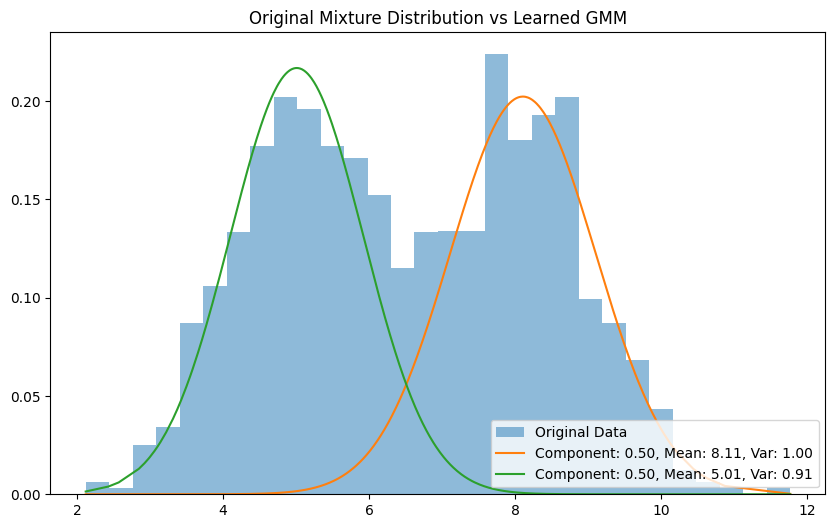

In [8]:
from scipy.stats import norm
from numpy import array, argmax
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def gmm_init(k, dataset):
    kmeans = KMeans(k, init='k-means++').fit(X=array(dataset).reshape(-1, 1))
    gmm_params = []
    for i in range(k):
        count = 0
        sum_x = 0
        sum_x_squared = 0
        for j in range(len(dataset)):
            if kmeans.labels_[j] == i:
                count += 1
                sum_x += dataset[j]
                sum_x_squared += dataset[j] ** 2
        mixture_prop = count / len(dataset)
        mean = sum_x / count if count != 0 else 0
        variance = (sum_x_squared / count) - (mean ** 2) if count != 0 else 0
        gmm_params.append(Component(mixture_prop, mean, variance))
    return gmm_params


def compute_gmm(k, dataset, probs):
    '''
        Compute P(C_j), mean_j, var_j
    '''
    gmm_params = []
    for j in range(k):
        count = 0
        sum_x = 0
        sum_x_squared = 0
        for i in range(len(dataset)):
            count += probs[i][j]
            sum_x += probs[i][j] * dataset[i]
            sum_x_squared += probs[i][j] * (dataset[i] ** 2)
        mixture_prop = count / len(dataset)
        mean = sum_x / count if count != 0 else 0
        variance = (sum_x_squared / count) - (mean ** 2) if count != 0 else 0
        gmm_params.append(Component(mixture_prop, mean, variance))
    return gmm_params


def compute_probs(k, dataset, gmm_params):
    '''
        For all x_i in dataset, compute P(C_j | X_i)
        = P(X_i | C_j)P(C_j) / P(X_i) for all C_j
        return the list of lists of all P(C_j | X_i)
        for all x_i in dataset.
    '''
    probs = []
    for x in dataset:
        p_x_given_c = [comp.mixture_prop * norm.pdf(x, comp.mean, comp.variance) for comp in gmm_params]
        p_x = sum(p_x_given_c)
        probs.append([p / p_x for p in p_x_given_c])
    return probs


def expectation_maximization(k, dataset, iterations):
    '''
        Repeat for a set number of iterations.
    '''
    gmm_params = gmm_init(k, dataset)
    for _ in range(iterations):
        # expectation step
        probs = compute_probs(k, dataset, gmm_params)

        # maximization step
        gmm_params = compute_gmm(k, dataset, probs)

    return probs, gmm_params


def plot_gmm(gmm_params, dataset):
    x = array(dataset)
    x.sort()
    x_axis = list(set(x))
    x_axis.sort()
    plt.figure(figsize=(10, 6))
    plt.hist(dataset, bins=30, density=True, alpha=0.5, label='Original Data')
    for comp in gmm_params:
        y = comp.mixture_prop * norm.pdf(x_axis, comp.mean, comp.variance)
        plt.plot(x_axis, y, label=f'Component: {comp.mixture_prop:.2f}, Mean: {comp.mean:.2f}, Var: {comp.variance:.2f}')
    plt.title('Original Mixture Distribution vs Learned GMM')
    plt.legend()
    plt.show()

data = generate_gmm_dataset(example_gmm, 1000)
probs, learned_gmm_params = expectation_maximization(len(example_gmm), data, 5)
plot_gmm(learned_gmm_params, data)

Notes:

1. your code should work with any number of components, each with reasonable parameters.
2. your code should work for 1 to about 5 iterations of the EM algorithm. It may not work for iterations over 10 because the math we are doing may overflow and create `nans` - that's ok / don't worry about it.